In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
mouse_drug_file_path = os.path.join("Data","mouse_drug_data.csv")
clinical_trial_file_path = os.path.join("Data","clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv(mouse_drug_file_path)
clinical_trial_data = pd.read_csv(clinical_trial_file_path)

In [160]:
main_df = clinical_trial_data.join(mouse_drug_data.set_index("Mouse ID"), on = "Mouse ID")
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [34]:
drug_tumor = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
drug_tumor

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [154]:
err= pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())
err

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [155]:
pivottbl = pd.DataFrame(pd.pivot_table(drug_tumor, values = "Tumor Volume (mm3)", index = ["Timepoint"], columns = ["Drug"]))
errpivot = pd.DataFrame(pd.pivot_table(err, values = "Tumor Volume (mm3)", index = ["Timepoint"], columns = ["Drug"]))
pivottbl

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [157]:
cols = ["Infubinol", "Capomulin", "Placebo", "Ketapril"]


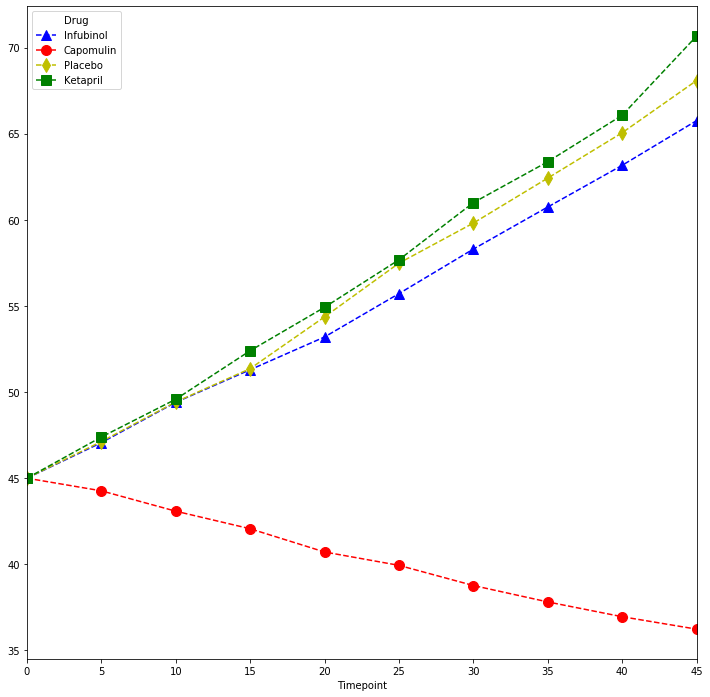

In [203]:
#ax= pivottbl.plot(y = cols, figsize=(12,12), style= ['b^--', 'ro--', 'yd--', 'gs--'], yerr = errpivot, legend = False)
pivottbl.plot(y = cols, figsize=(12,12), style=['b^--', 'ro--', 'yd--', 'gs--'], markersize=10)
plt.show()

# Metastatic Response to Treatment

In [199]:
drug_ms = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())
drug_ms_pivottbl = pd.DataFrame(pd.pivot_table(drug_ms, values = "Metastatic Sites", index = ["Timepoint"], columns = ["Drug"]))
drug_ms_pivottbl


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [198]:
drug_ms_err = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem())
drug_ms_err_pivot = pd.DataFrame(pd.pivot_table(drug_ms_err, values = "Metastatic Sites", index = ["Timepoint"], columns = ["Drug"]))
drug_ms_err_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


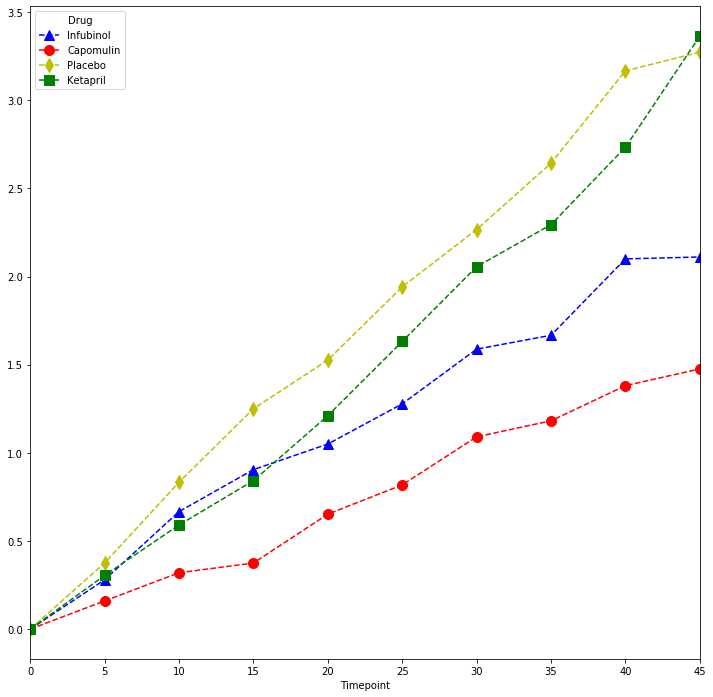

In [206]:
cols = ["Infubinol", "Capomulin", "Placebo", "Ketapril"]
drug_ms_pivottbl.plot(y = cols, figsize=(12,12), style=['b^--', 'ro--', 'yd--', 'gs--'], markersize=10)
plt.show()

# Survival Rates

In [214]:
drug_mouse = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique())
drug_mouse_pivottbl = pd.DataFrame(pd.pivot_table(drug_mouse, values = "Mouse ID", index = ["Timepoint"], columns = ["Drug"]))
drug_mouse_pivottbl

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [244]:
drug_mouse = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique())
drug_mouse["Percent"] = (drug_mouse["Mouse ID"] / drug_mouse["Mouse ID"].max()*100)
drug_mouse_pivottbl = pd.DataFrame(pd.pivot_table(drug_mouse, values = "Percent", index = ["Timepoint"], columns = ["Drug"]))
drug_mouse_pivottbl
#drug_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


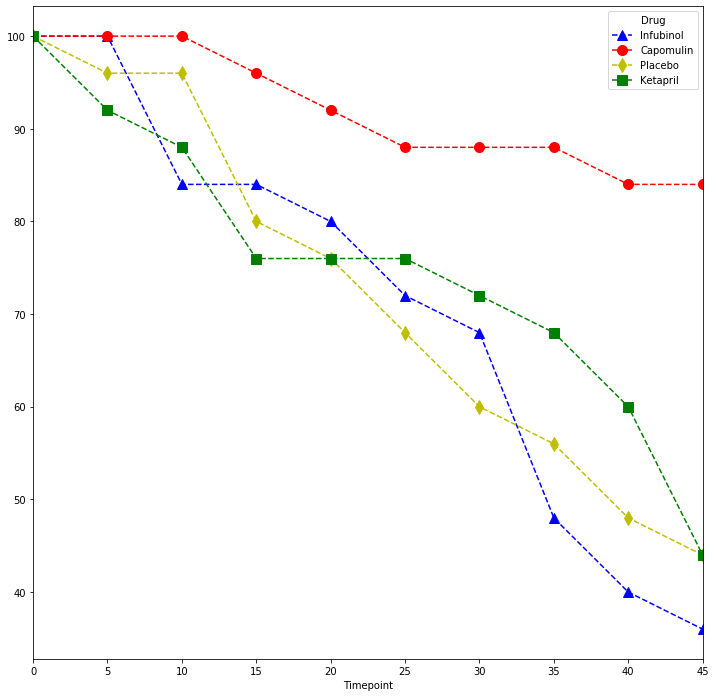

In [245]:
cols = ["Infubinol", "Capomulin", "Placebo", "Ketapril"]
drug_mouse_pivottbl.plot(y = cols, figsize=(12,12), style=['b^--', 'ro--', 'yd--', 'gs--'], markersize=10)
plt.show()

# Summary Bar Graph